In [5]:
#installing required libraries
import piplite
await piplite.install('seaborn')

In [6]:
#import required libraries
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [7]:
#download the dataset to browser

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'


In [8]:
#load the dataframe and store it in dataframe df
await download(filepath, "laptops.csv")
file_name="laptops.csv"

df = pd.read_csv(file_name, header=0)

In [9]:
#check the dataframe
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [10]:
#remove columns "unnamed:0.1" & "unnamed:0"
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [12]:
#Task 1 : Using Cross validation to improve the model

#split the data into training and testing data
#target data: price & dataframe: y_data
y_data = df["Price"]

#drop price data in dataframe x_data:
x_data = df.drop("Price", axis = 1)

In [13]:
#split data into training & testing data (10%)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 24
number of training samples: 214


In [18]:
#single linear regression using "CPU_frequency" parameter
lre=LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)

LinearRegression()

In [19]:
#calculate the R2 of test data
lre.score(x_test[['CPU_frequency']], y_test)

-0.06599437350393766

In [20]:
#calculate the R2 of train data
lre.score(x_train[['CPU_frequency']], y_train)

0.14829792099817962

In [21]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

In [27]:
#import the object, feature (CPU_frequency), and the target data(y_data)
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
Rcross

array([-0.82012763,  0.10035872,  0.11202939, -0.03662978])

In [24]:
#calculate average R2 & SD 
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.1610923238859522 and the standard deviation is 0.38495797866647274


In [29]:
#Task 2 : Overfitting
#split data into training & testing data (50%)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.50, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 119
number of training samples: 119


In [31]:
#create  polynomial feature to identify the point of overfitting the model 
#evaluate R2 score using different degree of polynomial features, ranging 1 to 5)
#save the set of R2 score as a list

lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

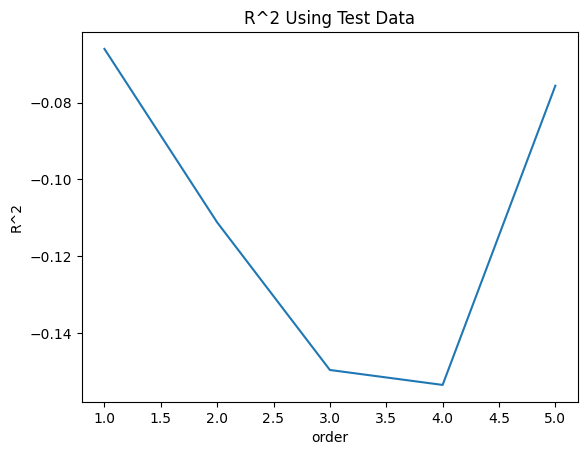

In [34]:
#plot the R2 score against order
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')  

In [35]:
#the score drop in order 3.0 and drop more in order 4.0


In [36]:
#Task 3 : Ridge Regression
#Create polynomial feature model (degree=2)
pr=PolynomialFeatures(degree=2)

#create the training and testing attribute sets
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]) 

In [38]:
#create Ridge Regression model
#evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001
#create a list of all Ridge Regression R^2 scores for training and testing data
from sklearn.linear_model import Ridge
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

<ipython-input-38-094c97e70dd8>:10: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  pbar = tqdm(Alpha)
100%|██████████| 999/999 [00:01<00:00, 554.38it/s, Test Score=0.371, Train Score=0.634]


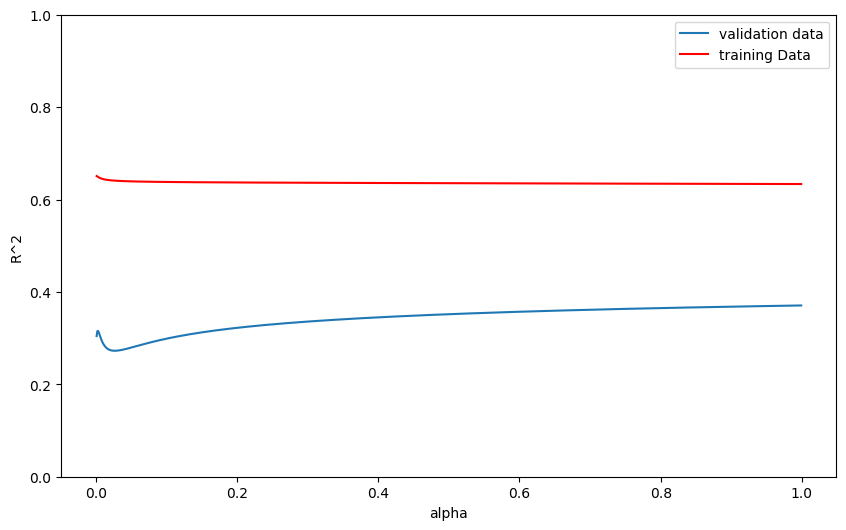

In [39]:
#Plot the R^2 values for training and testing sets with respect to the value of alpha
width = 10
height = 6
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [40]:
#Task : Grid Search
#identify the value of alpha for which the model performs best

#Define parameter grid without 'normalize'
parameters1 = [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

#Create a Ridge instance and run Grid Search using a 4 fold cross validation
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

#Fit the Grid Search to the training data
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

#Best model
bestRR = Grid1.best_estimator_
print(bestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.2447803981790706
